# TP3 – Performance d’un classifieur

In [1]:
from TP3_ETU import *
from sklearn.metrics import confusion_matrix, accuracy_score
class t:()

## I. Chargement et visualisation des données

Questions \
Comment sont constituées les bases d’apprentissage et de test ?  Quelle est la dimension des 
données ? Combien y a-t-il de classes et d’exemples de chaque classe ?

In [2]:
print(f"dimentions base d'apprentissage X_train: {X_train.shape}")
print(f"dimentions base d'apprentissage X_train: {X_test.shape}")
print(f"Il y a {X_train.shape[1]} classes : \n\
      {X_train.shape[0]} exemples de chaques classes dans la base d'entraînement\n\
      {X_test.shape[0]} exemples de chaques classes dans la base de test")
print(f"Il y a {100*X_train.shape[0]/(X_train.shape[0]+X_test.shape[0]):.2f}% des données dans la base de d'entraînement")
print(f"Les données sont en {X_train.dtype}")

dimentions base d'apprentissage X_train: (4739627, 2)
dimentions base d'apprentissage X_train: (566200, 2)
Il y a 2 classes : 
      4739627 exemples de chaques classes dans la base d'entraînement
      566200 exemples de chaques classes dans la base de test
Il y a 89.33% des données dans la base de d'entraînement
Les données sont en float64


Réduction des données : on garde 1 pixel sur 1000\
(Changer de random state)

In [3]:
X_train, _, y_train, _ = train_test_split(X_train, y_train, train_size=1/1000, random_state=42)
X_test, _, y_test, _ = train_test_split(X_test, y_test, train_size=1/1000, random_state=42)

In [4]:
print(f"dimentions base d'apprentissage X_train: {X_train.shape}")
print(f"dimentions base d'apprentissage X_test: {X_test.shape}")
print(f"Il y a {X_train.shape[1]} classes : \n\
      {X_train.shape[0]} exemples de chaques classes dans la base d'entraînement\n\
      {X_test.shape[0]} exemples de chaques classes dans la base de test")
print(f"Il y a {100*X_train.shape[0]/(X_train.shape[0]+X_test.shape[0]):.2f}% des données dans la base de d'entraînement")
print(f"Les données sont en {X_train.dtype}")

dimentions base d'apprentissage X_train: (4739, 2)
dimentions base d'apprentissage X_test: (566, 2)
Il y a 2 classes : 
      4739 exemples de chaques classes dans la base d'entraînement
      566 exemples de chaques classes dans la base de test
Il y a 89.33% des données dans la base de d'entraînement
Les données sont en float64


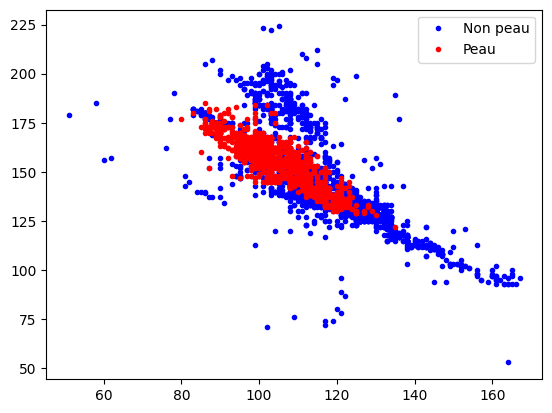

In [5]:
# #############################################################################
# I.	Chargement et visualisation des données

#Pixel peau
Peau_Train = X_train[np.where(y_train==1),:]
Peau_Train = np.reshape(Peau_Train,(Peau_Train.shape[1],Peau_Train.shape[2] ))
#Pixel non peau
Nonpeau_Train = X_train[np.where(y_train==0),:]
Nonpeau_Train = np.reshape(Nonpeau_Train,(Nonpeau_Train.shape[1],Nonpeau_Train.shape[2] ))


plt.plot(Nonpeau_Train[:,0], Nonpeau_Train[:,1], '.b', label='Non peau')
plt.plot(Peau_Train[:,0], Peau_Train[:,1], '.r', label='Peau')
plt.legend()
plt.show()


## II. Modélisation de la vraisemblance des observations par une loi normale 2D avec des dimensions décorrélées

### a. Estimation de la vraisemblance des observations des pixels de teinte chaire

In [6]:
# Déterminer 𝑚Cb, 𝑚Cr, 𝜎Cb, 𝜎Cr
mcb = np.mean(Peau_Train[0])
mcr = np.mean(Peau_Train[1])
scb = np.std(Peau_Train[0])
scr = np.std(Peau_Train[1])

Questions \
Pourquoi les variables sont-elles indicées par Cb et Cr ? Quelle est la dimension de 𝑚Cb, 𝑚Cr, 
𝜎Cb, 𝜎Cr ? \
Cb : Chrominance bleue\
Cr : Chrominance rouge\
On a supprimé la Luminance car on veut être insensible à l'intensité lumineuse

In [7]:
print('type de mcb :',mcb.dtype)
print('type de mcr :',mcr.dtype)
print('type de scb :',scb.dtype)
print('type de scr :',scr.dtype)

type de mcb : float64
type de mcr : float64
type de scb : float64
type de scr : float64


In [8]:
# from scipy.stats import multivariate_normal, norm 
p1 = norm(mcb, scb) 
p2 = norm(mcr, scr) 
p_train = p1.pdf(X_train[:,0]) * p2.pdf(X_train[:,1]) 
p_test = p1.pdf(X_test[:,0]) * p2.pdf(X_test[:,1]) 

Questions \
Pour un pixel 𝒙 de teinte chaire donné, quelle est la dimension de 𝑝(𝒙/𝑐ℎ𝑎𝑖𝑟) ?  \
Quelle est la dimension du vecteur p_train? \
Quelle  hypothèse  nous  permet  d’estimer la valeur de la loi normale à partir de l’équation 
précédente ?

In [9]:
print('La dimention du vecteur p_train est : ',p_train.shape)
print('Pour 1 pixel de teinte chaire donné, p(x/chair) est de type :',p_train[0].dtype)
print("C'est l'hypothèse de l'indépendance de Cb et Cr qui nous  permet  d’estimer\n" \
" la valeur de la loi normale à partir de l’équation précédente ")

La dimention du vecteur p_train est :  (4739,)
Pour 1 pixel de teinte chaire donné, p(x/chair) est de type : float64
C'est l'hypothèse de l'indépendance de Cb et Cr qui nous  permet  d’estimer
 la valeur de la loi normale à partir de l’équation précédente 


### b. Mise en place du classifieur 

In [31]:
mp_train = np.mean(p_train)
p_train_seuillee = [1 if p >= mp_train else 0 for p in p_train ] #on seuille par mp_train

conf_matrice=confusion_matrix(y_train, p_train_seuillee) #(y_verité,y_prediction)
#print("Matrice de confusion [0:NonChaire|1:Chaire]:\n",conf_matrice)
conf_matrice = conf_matrice[::-1,::-1]
print("Matrice de confusion [0:Chaire|1:NonChaire]:\n",conf_matrice)

score = accuracy_score(y_train, p_train_seuillee)  # (y_verité,y_prediction)
print("taux de reconnaissance : ",score)

print("\nOn s'intéresse à la classe Chair (Positif = Chair)")
t.TP = conf_matrice[0,0]; t.TN = conf_matrice[1,1]
t.FP = conf_matrice[1,0]; t.FN = conf_matrice[0,1]
print(f"TP : {t.TP} (nb de Chair biens classés)")
print(f"TN : {t.TN} (nb de NonChair biens classés)")
print(f"FP : {t.FP} (nb de Chair classés NonChair)")
print(f"FN : {t.FN} (nb de NonChair classés Chair)")
print("Soient : PF les Positifs de Terrain, NF les Négatifs de Terrain, P les prédits Positifs")
print(f'sensibilité (TP/PF) = {t.TP/(t.TP+t.FN):.2f}')
print(f'spécificité (TN/NF) = {t.TN/(t.FP+t.TN):.2f} ')
print(f"taux de bonne reconnaissance (précision) (TP/P) = {t.TP/(t.TP+t.FP):.2f}")

Matrice de confusion [0:Chaire|1:NonChaire]:
 [[ 287  961]
 [2404 1087]]
taux de reconnaissance :  0.28993458535556027

On s'intéresse à la classe Chair (Positif = Chair)
TP : 287 (nb de Chair biens classés)
TN : 1087 (nb de NonChair biens classés)
FP : 2404 (nb de Chair classés NonChair)
FN : 961 (nb de NonChair classés Chair)
Soient : PF les Positifs de Terrain, NF les Négatifs de Terrain, P les prédits Positifs
sensibilité (TP/PF) = 0.23
spécificité (TN/NF) = 0.31 
taux de bonne reconnaissance (précision) (TP/P) = 0.11
